In [125]:
from evaluator import *
from leaf_classification import ImageRecognition
from sklearn import metrics
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import math
import scipy
from scipy import ndimage
%matplotlib inline

In [5]:
ir = ImageRecognition()
ir.load_processed_data('data_no_id_100.pkl')
# ir.load_processed_data('data_csv_only.pkl')

In [94]:
def plotImages(units):
    filters = units.shape[0]
    plt.figure(1, figsize=(10,10))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[i,:,:], interpolation="nearest", cmap="gray")

In [223]:
ir.data[0].shape
pic = ir.data[0:3,:10000]
pic = np.reshape(pic, [3, 100,100,1])

1.0.0


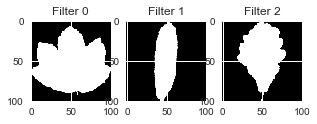

In [159]:
plotImages(pic)

(3, 100, 100)


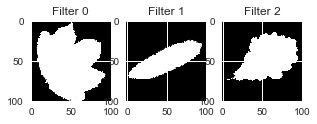

In [232]:
# rotated_pic = tf.contrib.image.rotate(pic, random.uniform(0,6.28))
pic2 = tf.placeholder(tf.float32, [None,100,100, 1])
rotated_pic = tf.contrib.image.rotate(pic2, 200)
sess = tf.Session()
output = sess.run(rotated_pic, feed_dict={pic2:pic})
# plt.imshow(output, cmap="gray")
output = np.reshape(output, [3,100,100])
print output.shape
plotImages(output)

(3, 100, 100, 1)
-10


TypeError: Invalid dimensions for image data

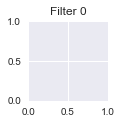

In [224]:
print pic.shape
from random import randint
degree = randint(0,3) * 90 + randint(-15,15)
print degree
out = scipy.ndimage.rotate(pic, degree, axes=(1,2), order=0)
# out = scipy.ndimage.rotate(pic, 105, axes=(1,2), order=0)
plotImages(out)
np.max(out)

In [151]:
from scipy import misc
misc.imrotate(pic, )

TypeError: Cannot handle this data type

In [45]:
run_name = '02-20-2017_05:18:32'
#run_name = 'mlp_02-20-2017_06:09:32'
names, train_index, test_index = load_metadata('metadata_' + run_name + '.pkl')

In [46]:
#tmp = ir.data[test_index[0]]
#test = tmp[:,:-99]
#label = tmp[:, -99:]
test = ir.data[:,:-99]
label = ir.data[:,-99:]
print test.shape
print label.shape
metadata = dict(
    test=test,
    test_labels=label,
    id=ir.identifier,
    one_hot_names=ir.one_hot_names,
    n_input=ir.n_input,
    model_location="model/model_" + run_name + "-999",
    tensor_name="output/activation:0",
    input_x_tensor_name="input_1/x-input:0",
    input_y_tensor_name="input_1/y-input:0",
    save_dir="predictions/",
    save_name="model_" + run_name + ".pkl",
    learning_rate=0.01)

(990, 192)
(990, 99)


In [47]:
load_session_and_save_prediction(**metadata)

In [48]:
pred = load_predictions(metadata['save_dir'] + metadata['save_name'])
best_guess_index, actual_index, correct_predictions, correct_percentage = compare_with_true(pred, (metadata['test_labels']))
print sklearn.metrics.classification_report(actual_index, best_guess_index,target_names=metadata['one_hot_names'])


                              precision    recall  f1-score   support

             Acer_Capillipes       1.00      1.00      1.00        10
             Acer_Circinatum       1.00      1.00      1.00        10
                   Acer_Mono       1.00      1.00      1.00        10
                 Acer_Opalus       0.91      1.00      0.95        10
               Acer_Palmatum       1.00      1.00      1.00        10
                 Acer_Pictum       1.00      1.00      1.00        10
             Acer_Platanoids       1.00      1.00      1.00        10
                 Acer_Rubrum       1.00      1.00      1.00        10
              Acer_Rufinerve       1.00      1.00      1.00        10
            Acer_Saccharinum       1.00      1.00      1.00        10
               Alnus_Cordata       1.00      1.00      1.00        10
          Alnus_Maximowiczii       1.00      1.00      1.00        10
                 Alnus_Rubra       1.00      1.00      1.00        10
           Alnus_Si

In [44]:
pred = load_predictions(metadata['save_dir'] + metadata['save_name'])
best_guess_index, actual_index, correct_predictions, correct_percentage = compare_with_true(pred[test_index[0]], (metadata['test_labels'])[test_index[0]])
print sklearn.metrics.classification_report(actual_index, best_guess_index,target_names=metadata['one_hot_names'])
#print sklearn.metrics.classification_report(best_guess_index, actual_index, target_names=metadata['one_hot_names'])

                              precision    recall  f1-score   support

             Acer_Capillipes       1.00      1.00      1.00         1
             Acer_Circinatum       1.00      1.00      1.00         1
                   Acer_Mono       1.00      1.00      1.00         1
                 Acer_Opalus       1.00      1.00      1.00         2
               Acer_Palmatum       1.00      1.00      1.00         1
                 Acer_Pictum       1.00      1.00      1.00         2
             Acer_Platanoids       1.00      1.00      1.00         1
                 Acer_Rubrum       1.00      1.00      1.00         1
              Acer_Rufinerve       1.00      1.00      1.00         1
            Acer_Saccharinum       1.00      1.00      1.00         1
               Alnus_Cordata       1.00      1.00      1.00         1
          Alnus_Maximowiczii       1.00      1.00      1.00         2
                 Alnus_Rubra       1.00      1.00      1.00         2
           Alnus_Si

Confusion matrix, without normalization


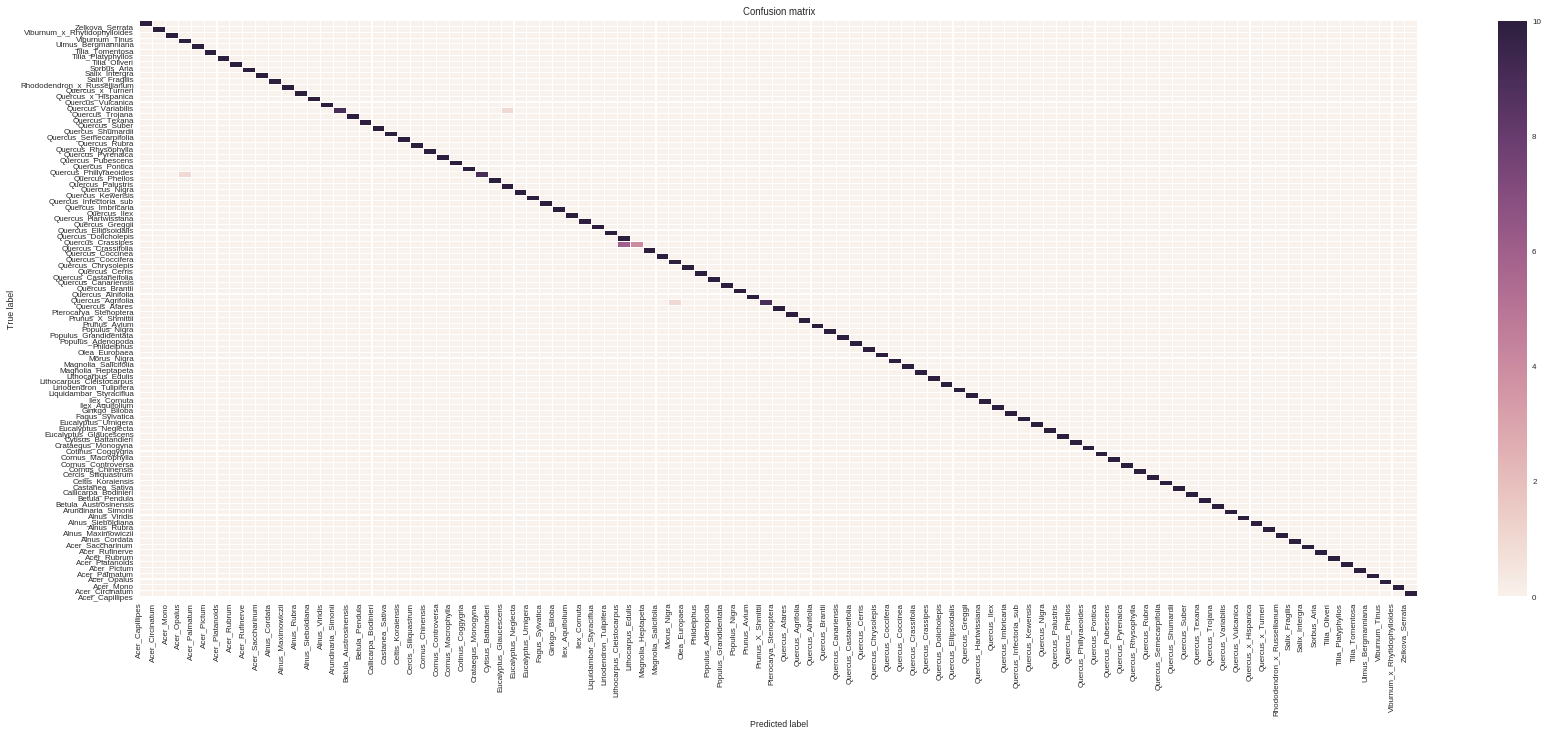

In [18]:
cm = sklearn.metrics.confusion_matrix(actual_index, best_guess_index)
plot_confusion_matrix(cm, metadata['one_hot_names'])